In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/input_data.csv')
dfc = data.copy()

In [ ]:
#for viewing all the columns
pd.pandas.set_option('display.max_columns',None)
dfc.head()

,Unnamed: 0,s_no,FTI,FTI_measured,I131_treatment,T3,T3_measured,T4U,T4U_measured,TBG,TBG_measured,TSH,TSH_measured,TT4,TT4_measured,age,class,goitre,hypopituitary,lithium,on_antithyroid_medication,on_thyroxine,pregnant,psych,query_hyperthyroid,query_hypothyroid,query_on_thyroxine,referral_source,sex,sick,thyroid_surgery,tumor
0,0,4317,?,f,f,4.8,t,?,f,?,f,0.05,t,32,t,38,-[850912043],f,f,f,f,f,f,f,f,f,f,other,M,f,f,f
1,1,3372,80,t,f,2,t,0.89,t,?,f,0.015,t,71,t,30,-[850702085],f,f,f,f,f,f,f,f,f,f,SVI,F,f,f,f
2,2,1584,98,t,f,1.4,t,0.96,t,?,f,7.3,t,95,t,36,G[841210031],f,f,f,f,f,f,f,f,f,f,SVI,F,f,f,f
3,3,7034,115,t,f,2.4,t,1.19,t,?,f,2.1,t,137,t,56,-[860723038],f,f,f,f,f,f,f,f,f,f,SVI,?,f,f,f
4,4,9067,92,t,f,?,f,0.98,t,?,f,1.7,t,90,t,79,-[870109039],f,f,f,f,f,f,f,f,f,f,SVI,M,t,f,f


In [ ]:
dfc.tail()

,Unnamed: 0,s_no,FTI,FTI_measured,I131_treatment,T3,T3_measured,T4U,T4U_measured,TBG,TBG_measured,TSH,TSH_measured,TT4,TT4_measured,age,class,goitre,hypopituitary,lithium,on_antithyroid_medication,on_thyroxine,pregnant,psych,query_hyperthyroid,query_hypothyroid,query_on_thyroxine,referral_source,sex,sick,thyroid_surgery,tumor
9167,9167,3405,?,f,f,1.8,t,?,f,?,f,3.1,t,94,t,34,-[850704048],f,f,f,f,f,f,f,f,f,f,other,F,f,f,f
9168,9168,5504,76,t,f,0.7,t,0.95,t,?,f,116,t,72,t,49,MK[851217007],f,f,f,f,t,f,f,f,f,f,other,F,f,f,f
9169,9169,3476,103,t,f,1.4,t,0.87,t,?,f,1.7,t,89,t,66,-[850710046],f,f,f,f,f,f,f,t,f,f,SVI,F,f,t,f
9170,9170,2542,92,t,f,2.2,t,1.07,t,?,f,1,t,99,t,64,-[850430079],f,f,f,f,f,f,f,f,f,f,other,F,f,f,f
9171,9171,6931,126,t,f,2.1,t,0.9,t,?,f,0.3,t,114,t,47,-[860716038],f,f,f,f,f,f,f,f,f,f,other,F,f,f,f


In [ ]:
#CHECKING FOR NULLS
dfc.isna().sum()

Unnamed: 0                   0
s_no                         0
FTI                          0
FTI_measured                 0
I131_treatment               0
T3                           0
T3_measured                  0
T4U                          0
T4U_measured                 0
TBG                          0
TBG_measured                 0
TSH                          0
TSH_measured                 0
TT4                          0
TT4_measured                 0
age                          0
class                        0
goitre                       0
hypopituitary                0
lithium                      0
on_antithyroid_medication    0
on_thyroxine                 0
pregnant                     0
psych                        0
query_hyperthyroid           0
query_hypothyroid            0
query_on_thyroxine           0
referral_source              0
sex                          0
sick                         0
thyroid_surgery              0
tumor                        0
dtype: i

In [ ]:
#DROPPING UNWANTED COLUMNS

dfc.drop(['FTI_measured',
'I131_treatment',
'T3_measured',
'T4U_measured',
'TBG_measured',
'TSH_measured',
'TT4_measured',
'Unnamed: 0'],axis = 1 , inplace = True)

In [ ]:
#DISPALYING THE COUNT OF ? IN EACH COLUMN

question_mark_counts = dfc.apply(lambda col: col.eq("?").sum())

# Display the result
print(question_mark_counts)

s_no                            0
FTI                           802
T3                           2604
T4U                           809
TBG                          8823
TSH                           842
TT4                           442
age                             0
class                           0
goitre                          0
hypopituitary                   0
lithium                         0
on_antithyroid_medication       0
on_thyroxine                    0
pregnant                        0
psych                           0
query_hyperthyroid              0
query_hypothyroid               0
query_on_thyroxine              0
referral_source                 0
sex                           307
sick                            0
thyroid_surgery                 0
tumor                           0
dtype: int64


In [ ]:
#REPLACING ? WITH 0 IN DEPENDENT COLUMNS

columns_to_replace = ['FTI', 'T3', 'T4U', 'TBG', 'TSH', 'TT4']
dfc[columns_to_replace] = dfc[columns_to_replace].replace("?", 0)
dfc

,s_no,FTI,T3,T4U,TBG,TSH,TT4,age,class,goitre,hypopituitary,lithium,on_antithyroid_medication,on_thyroxine,pregnant,psych,query_hyperthyroid,query_hypothyroid,query_on_thyroxine,referral_source,sex,sick,thyroid_surgery,tumor
0,4317,0,4.8,0,0,0.05,32,38,-[850912043],f,f,f,f,f,f,f,f,f,f,other,M,f,f,f
1,3372,80,2,0.89,0,0.015,71,30,-[850702085],f,f,f,f,f,f,f,f,f,f,SVI,F,f,f,f
2,1584,98,1.4,0.96,0,7.3,95,36,G[841210031],f,f,f,f,f,f,f,f,f,f,SVI,F,f,f,f
3,7034,115,2.4,1.19,0,2.1,137,56,-[860723038],f,f,f,f,f,f,f,f,f,f,SVI,?,f,f,f
4,9067,92,0,0.98,0,1.7,90,79,-[870109039],f,f,f,f,f,f,f,f,f,f,SVI,M,t,f,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,3405,0,1.8,0,0,3.1,94,34,-[850704048],f,f,f,f,f,f,f,f,f,f,other,F,f,f,f
9168,5504,76,0.7,0.95,0,116,72,49,MK[851217007],f,f,f,f,t,f,f,f,f,f,other,F,f,f,f
9169,3476,103,1.4,0.87,0,1.7,89,66,-[850710046],f,f,f,f,f,f,f,t,f,f,SVI,F,f,t,f
9170,2542,92,2.2,1.07,0,1,99,64,-[850430079],f,f,f,f,f,f,f,f,f,f,other,F,f,f,f


In [ ]:
#DROPPING ROWS WHERE ? EXISTS IN SEX COLUMN

dfc['sex'].unique()
dfc = dfc[dfc['sex'] != '?']

In [ ]:
dfc.shape

(8865, 24)

In [ ]:
#DISPALYING THE COUNT OF 0 IN EACH COLUMN

zero_counts = dfc.apply(lambda col: col.eq(0).sum())

# Display the result
print(zero_counts)

s_no                            0
FTI                           768
T3                           2521
T4U                           775
TBG                          8534
TSH                           813
TT4                           420
age                             0
class                           0
goitre                          0
hypopituitary                   0
lithium                         0
on_antithyroid_medication       0
on_thyroxine                    0
pregnant                        0
psych                           0
query_hyperthyroid              0
query_hypothyroid               0
query_on_thyroxine              0
referral_source                 0
sex                             0
sick                            0
thyroid_surgery                 0
tumor                           0
dtype: int64


In [ ]:
# Convert numeric columns to numeric types

numeric_columns = ['FTI', 'T3', 'T4U', 'TBG', 'TSH', 'TT4', 'age']

dfc[numeric_columns] = dfc[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Now, describe() should work without issues
dfc.describe()


<ipython-input-77-4a72089ca1a8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc[numeric_columns] = dfc[numeric_columns].apply(pd.to_numeric, errors='coerce')


,s_no,FTI,T3,T4U,TBG,TSH,TT4,age
count,8865.000000,8865.000000,8865.000000,8865.000000,8865.000000,8865.000000,8865.000000,8865.000000
mean,4574.657417,103.063219,1.404275,0.891986,1.121111,4.699332,103.395337,74.363113
std,2653.736938,47.701137,1.155019,0.334516,7.048884,22.839062,43.139327,1204.292368
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2269.000000,88.000000,0.000000,0.820000,0.000000,0.200000,84.000000,37.000000
50%,4566.000000,106.000000,1.600000,0.940000,0.000000,1.200000,103.000000,55.000000
75%,6881.000000,126.000000,2.100000,1.050000,0.000000,2.500000,124.000000,68.000000
max,9172.000000,642.000000,18.000000,2.330000,200.000000,530.000000,600.000000,65526.000000


In [ ]:
#DROPPING S.NO AND TBG (IT CONTAINS MOSTLY 0)

dfc = dfc.drop(['s_no', 'TBG'], axis=1)


In [ ]:
dfc.describe()

,FTI,T3,T4U,TSH,TT4,age
count,8865.000000,8865.000000,8865.000000,8865.000000,8865.000000,8865.000000
mean,103.063219,1.404275,0.891986,4.699332,103.395337,74.363113
std,47.701137,1.155019,0.334516,22.839062,43.139327,1204.292368
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,88.000000,0.000000,0.820000,0.200000,84.000000,37.000000
50%,106.000000,1.600000,0.940000,1.200000,103.000000,55.000000
75%,126.000000,2.100000,1.050000,2.500000,124.000000,68.000000
max,642.000000,18.000000,2.330000,530.000000,600.000000,65526.000000


In [ ]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8865 entries, 0 to 9171
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   FTI                        8865 non-null   float64
 1   T3                         8865 non-null   float64
 2   T4U                        8865 non-null   float64
 3   TSH                        8865 non-null   float64
 4   TT4                        8865 non-null   float64
 5   age                        8865 non-null   int64  
 6   class                      8865 non-null   object 
 7   goitre                     8865 non-null   object 
 8   hypopituitary              8865 non-null   object 
 9   lithium                    8865 non-null   object 
 10  on_antithyroid_medication  8865 non-null   object 
 11  on_thyroxine               8865 non-null   object 
 12  pregnant                   8865 non-null   object 
 13  psych                      8865 non-null   objec

In [ ]:
#CHEKING FOR DUPLICATES
dfc.duplicated().sum()

0

In [ ]:
#VIEWING CLASS COLUMN
dfc['class']

0        -[850912043]
1        -[850702085]
2        G[841210031]
4        -[870109039]
6        -[850510051]
            ...      
9167     -[850704048]
9168    MK[851217007]
9169     -[850710046]
9170     -[850430079]
9171     -[860716038]
Name: class, Length: 8865, dtype: object

In [ ]:
#EXTRACTING ALL THE CHARACTERS BEFOR [ TO A NEW COLUMN CALLED TARGET
dfc['target'] = dfc['class'].str.split('[').str[0]  # Extract values before '['

In [ ]:
#CHECKING THE UNIQUE VALUES IN TARGET COLUMN
dfc['target'].unique()

array(['-', 'G', 'AK', 'N', 'R', 'O', 'M', 'S', 'A', 'B', 'J', 'C', 'K',
       'I', 'L', 'Q', 'P', 'F', 'MK', 'GK', 'FK', 'KJ', 'H|K', 'GI',
       'C|I', 'OI', 'LJ', 'GKJ', 'MI', 'D', 'E', 'D|R'], dtype=object)

In [ ]:
#MAPPING - REPLACING THE VALUES WITH THE CATEGORY NAME

dfc['target'] = dfc['target'].replace({
    '-': 'Negative',
    'G': 'Hyperthyroid',
    'AK': 'Hyperthyroid',
    'N': 'Hyperthyroid',
    'R': 'Hyperthyroid',
    'F': 'Hypothyroid',
    'O': 'Hypothyroid',
    'M': 'Hypothyroid',
    'S': 'Hypothyroid',
    'A': 'Hyperthyroid',
    'B': 'Hyperthyroid',
    'J': 'Hypothyroid',
    'C': 'Hyperthyroid',
    'K': 'Hyperthyroid',
    'I': 'Hyperthyroid',
    'L': 'Hypothyroid',
    'Q': 'Hypothyroid',
    'P': 'Hypothyroid',
    'MK': 'Hypothyroid',
    'GK': 'Hypothyroid',
    'FK': 'Hypothyroid',
    'D': 'Hypothyroid',
    'KJ': 'Hypothyroid',
    'H|K': 'Hypothyroid',
    'GI': 'Hypothyroid',
    'C|I': 'Hyperthyroid',
    'R': 'Hyperthyroid',
    'OI': 'Hypothyroid',
    'LJ': 'Hypothyroid',
    'GKJ': 'Hypothyroid',
    'MI': 'Hypothyroid',
    'E': 'Hypothyroid',
    'D|R': 'Hyperthyroid'})

#VIEWING TARGET

dfc['target']

0           Negative
1           Negative
2       Hyperthyroid
4           Negative
6           Negative
            ...     
9167        Negative
9168     Hypothyroid
9169        Negative
9170        Negative
9171        Negative
Name: target, Length: 8865, dtype: object

In [ ]:
#DROPPING CLASS COLUMN

dfc.drop(['class'],axis = 1 ,inplace = True)

In [ ]:
#RENAMING TAGERT WITH CLASS

dfc.rename(columns={'target': 'class'}, inplace=True)

In [ ]:
#CHEKING FOR UNIQUE VALUES IN CLASS COLUMN
dfc['class'].unique()

array(['Negative', 'Hyperthyroid', 'Hypothyroid'], dtype=object)

In [ ]:
dfc.head()

,FTI,T3,T4U,TSH,TT4,age,goitre,hypopituitary,lithium,on_antithyroid_medication,on_thyroxine,pregnant,psych,query_hyperthyroid,query_hypothyroid,query_on_thyroxine,referral_source,sex,sick,thyroid_surgery,tumor,class
0,0.0,4.8,0.00,0.050,32.0,38,f,f,f,f,f,f,f,f,f,f,other,M,f,f,f,Negative
1,80.0,2.0,0.89,0.015,71.0,30,f,f,f,f,f,f,f,f,f,f,SVI,F,f,f,f,Negative
2,98.0,1.4,0.96,7.300,95.0,36,f,f,f,f,f,f,f,f,f,f,SVI,F,f,f,f,Hyperthyroid
4,92.0,0.0,0.98,1.700,90.0,79,f,f,f,f,f,f,f,f,f,f,SVI,M,t,f,f,Negative
6,92.0,2.5,1.06,0.600,98.0,70,f,f,f,f,f,f,f,f,f,f,other,F,f,f,f,Negative


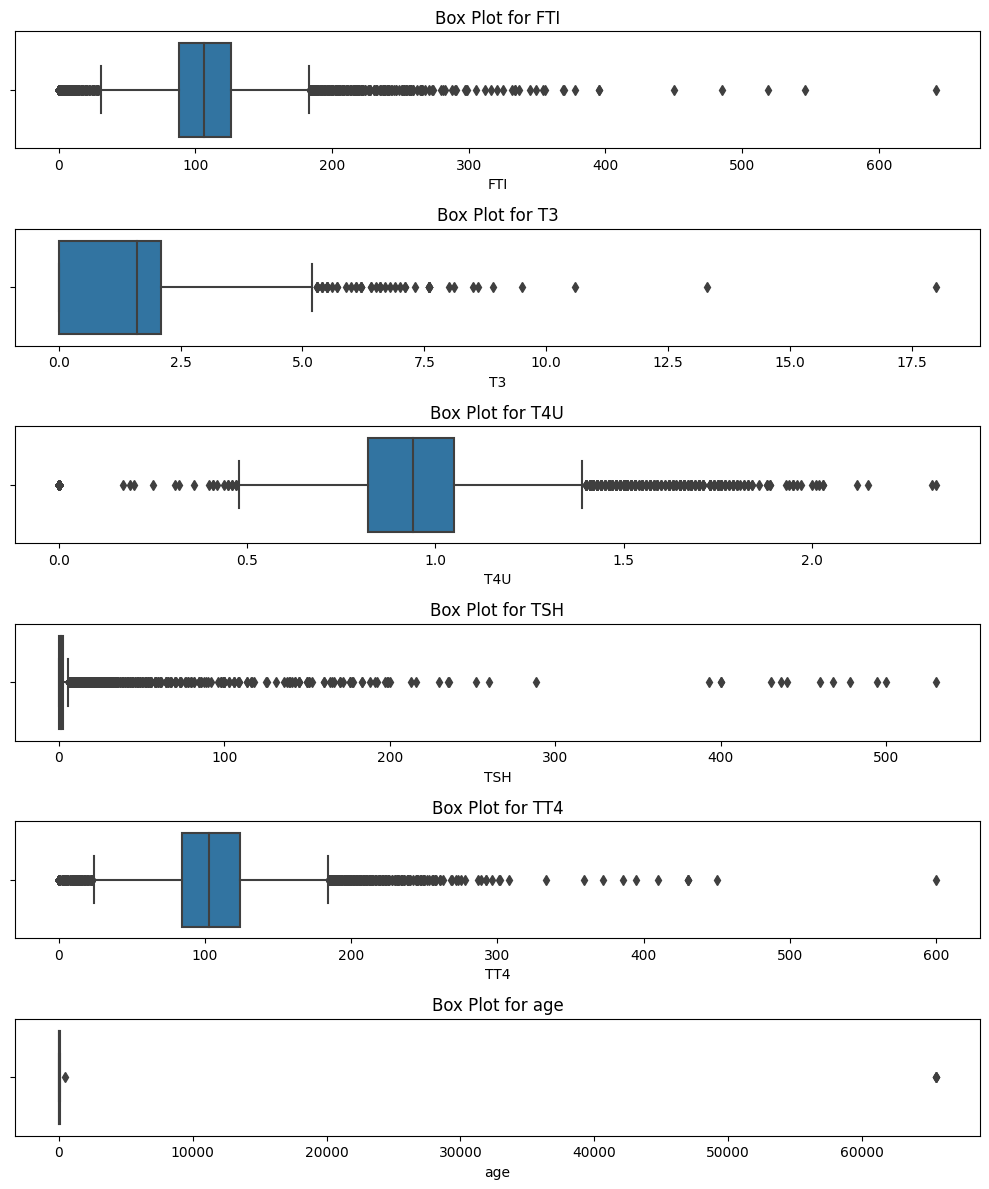

In [ ]:
#CHECKING FOR OUTLIERS USING BOXPLOT
columns_to_plot = ['FTI', 'T3', 'T4U', 'TSH', 'TT4', 'age']
# Create subplots for each numerical column
fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(10, 2*len(columns_to_plot)))
# Iterate over columns and create box plots using Seaborn
for i, column in enumerate(columns_to_plot):
    sns.boxplot(x=dfc[column], ax=axes[i])
    axes[i].set_title(f'Box Plot for {column}')
# Adjust layout
plt.tight_layout()
plt.show()

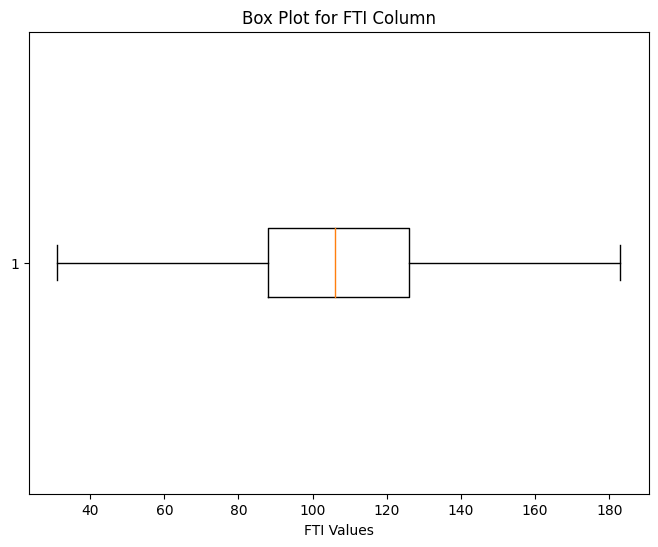

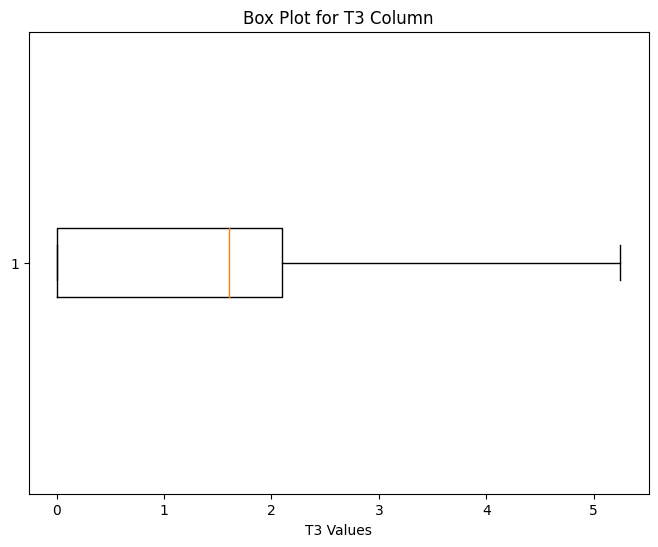

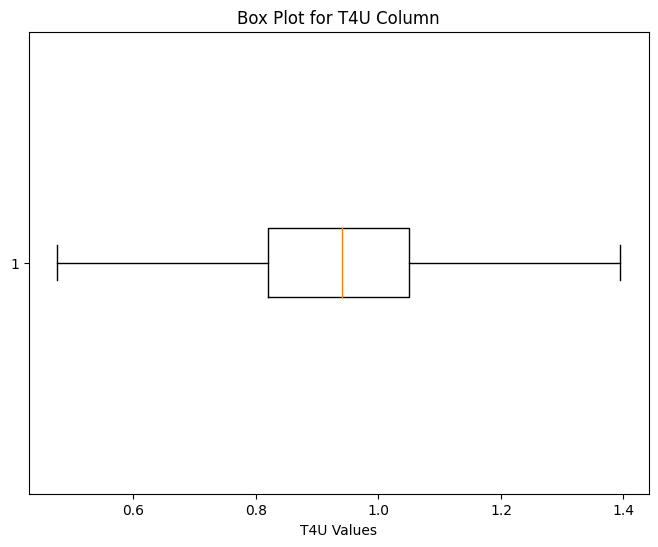

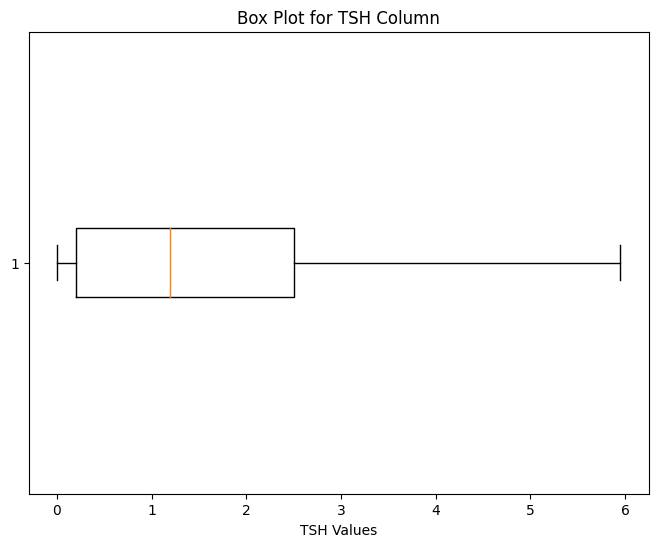

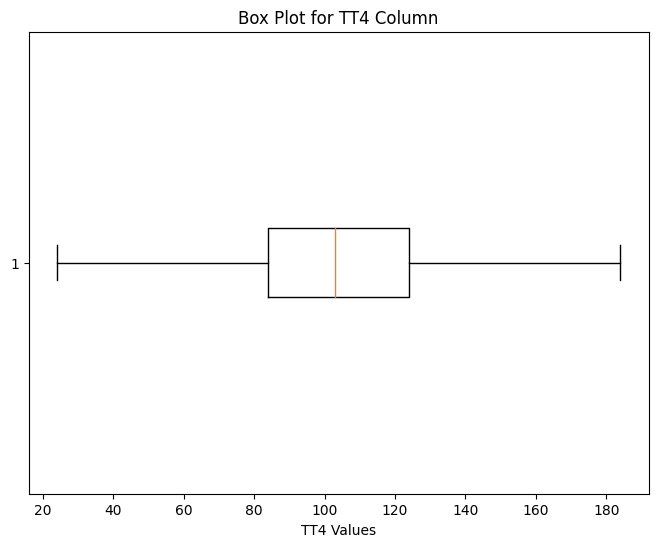

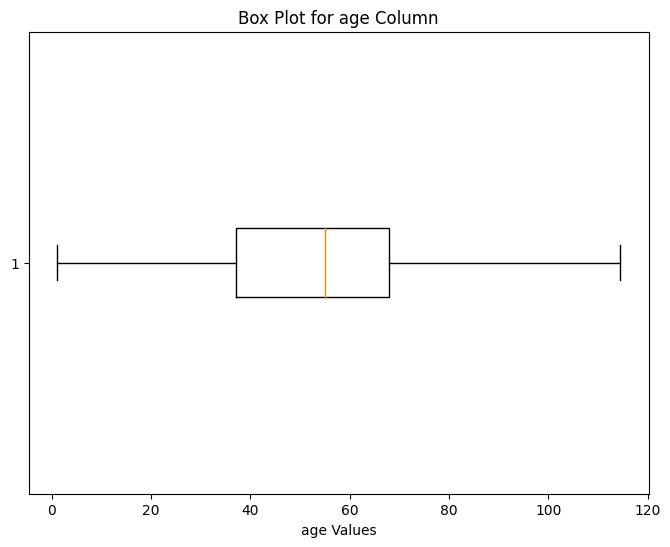

In [ ]:
#HANDLING OUTLIERS

# Numeric columns in dfc
numeric_columns = ['FTI', 'T3', 'T4U', 'TSH', 'TT4', 'age']

for column in numeric_columns:
    # Calculate quartiles and IQR
    q1 = dfc[column].quantile(0.25)
    q3 = dfc[column].quantile(0.75)
    iqr = q3 - q1

    # Set lower and upper thresholds
    lower_threshold = q1 - 1.5 * iqr
    upper_threshold = q3 + 1.5 * iqr

    # Clip values
    dfc[column] = dfc[column].clip(lower=lower_threshold, upper=upper_threshold)

    # Plot box plot after clipping
    plt.figure(figsize=(8, 6))
    plt.boxplot(dfc[column], vert=False)
    plt.title(f'Box Plot for {column} Column')
    plt.xlabel(f'{column} Values')
    plt.show()


In [ ]:
dfc.describe()

,FTI,T3,T4U,TSH,TT4,age
count,8865.000000,8865.000000,8865.000000,8865.000000,8865.000000,8865.000000
mean,104.522617,1.393835,0.926739,1.755818,103.508517,52.192104
std,36.718198,1.099255,0.216096,1.855924,36.249564,18.961148
min,31.000000,0.000000,0.475000,0.000000,24.000000,1.000000
25%,88.000000,0.000000,0.820000,0.200000,84.000000,37.000000
50%,106.000000,1.600000,0.940000,1.200000,103.000000,55.000000
75%,126.000000,2.100000,1.050000,2.500000,124.000000,68.000000
max,183.000000,5.250000,1.395000,5.950000,184.000000,114.500000


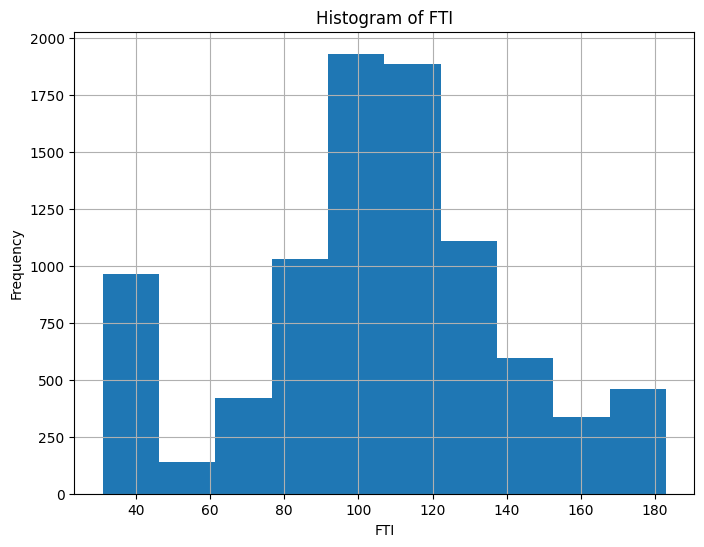

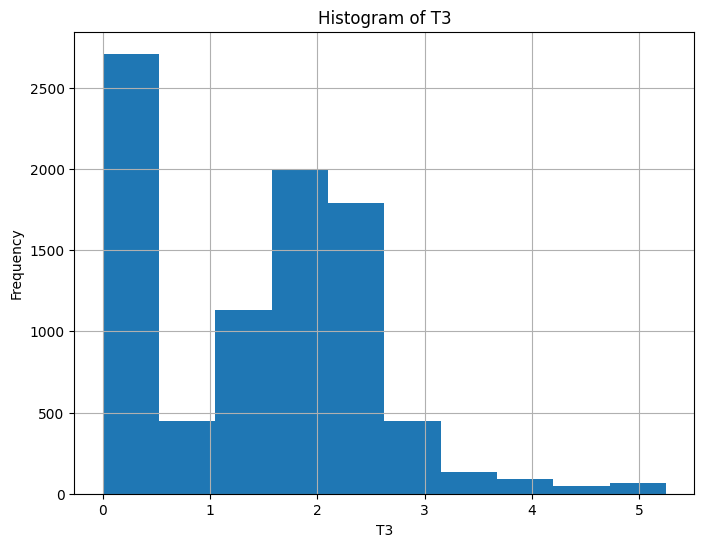

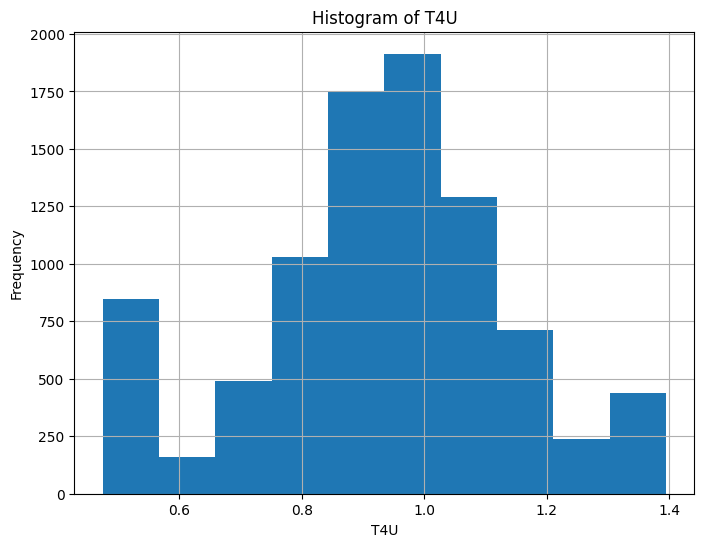

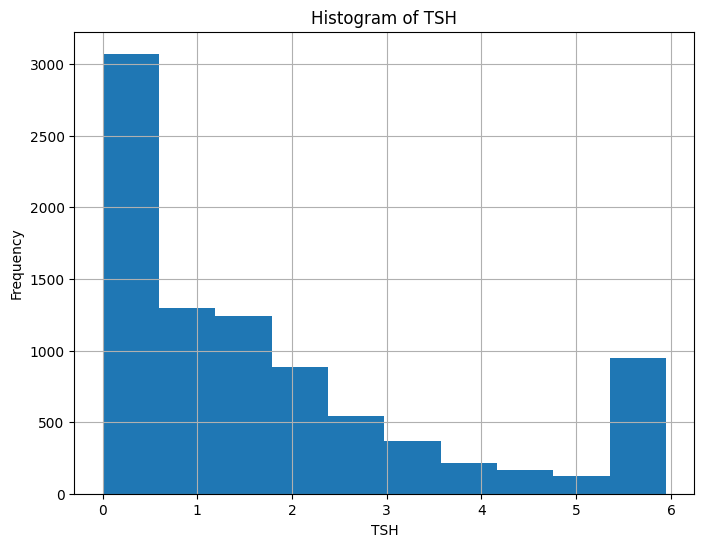

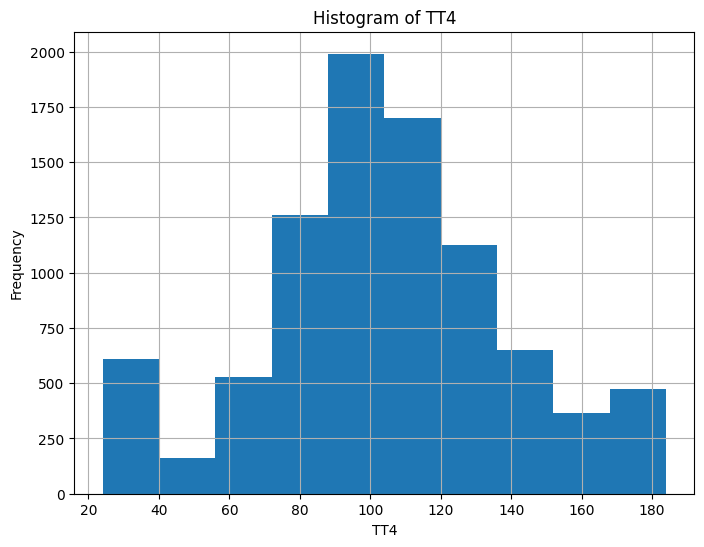

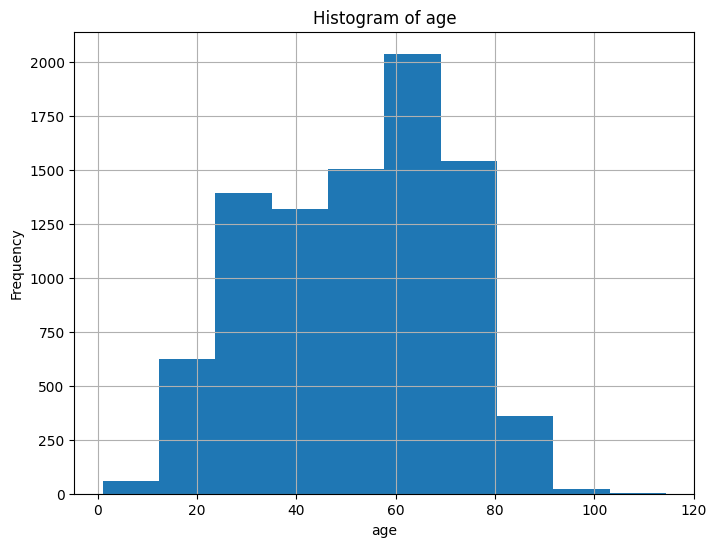

In [ ]:
#HISTOGRAM

# Selecting only the numeric columns from the DataFrame
numeric_columns = dfc.select_dtypes(include='number')

# Loop through each numeric column and create a histogram
for column in numeric_columns.columns:
    plt.figure(figsize=(8, 6))
    dfc[column].hist()
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()


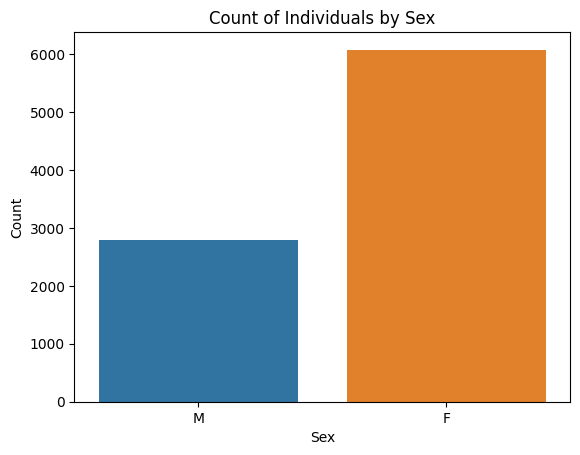

In [ ]:
#Count of Individuals by Sex

sns.countplot(x='sex', data=dfc)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Count of Individuals by Sex')
plt.show()

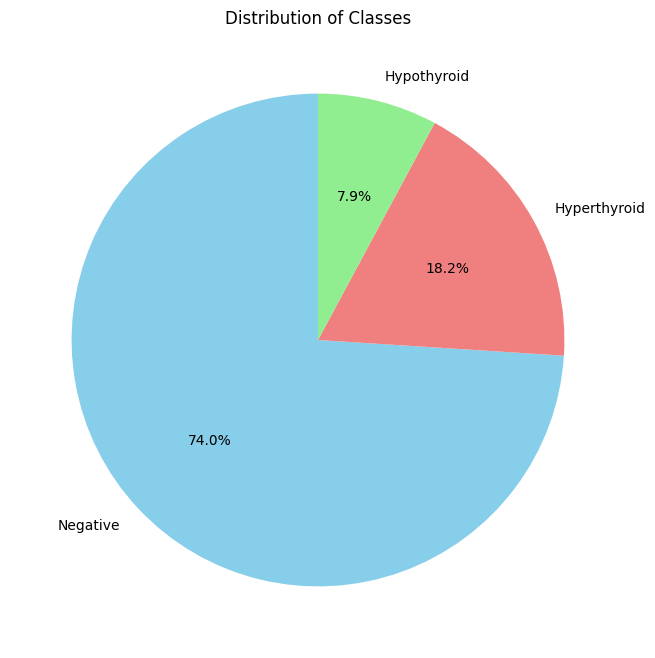

In [ ]:
#Distribution of Class

# Count the occurrences of each unique value in the 'class' column
class_counts = dfc['class'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Distribution of Classes')
plt.show()

<Figure size 800x600 with 0 Axes>

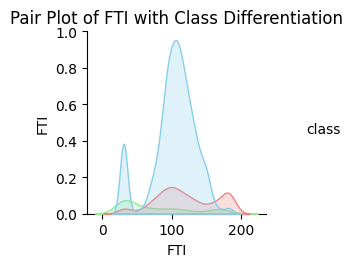

<Figure size 800x600 with 0 Axes>

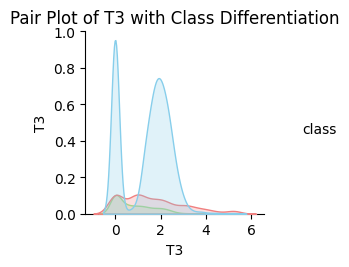

<Figure size 800x600 with 0 Axes>

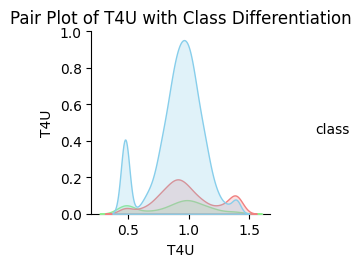

<Figure size 800x600 with 0 Axes>

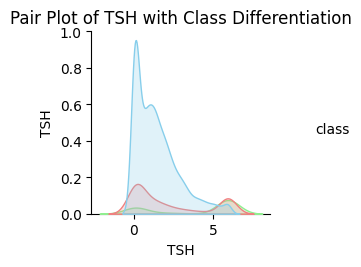

<Figure size 800x600 with 0 Axes>

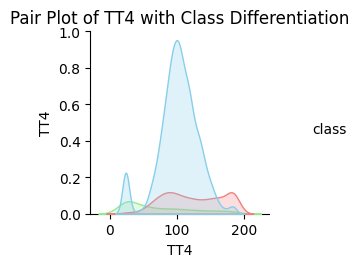

<Figure size 800x600 with 0 Axes>

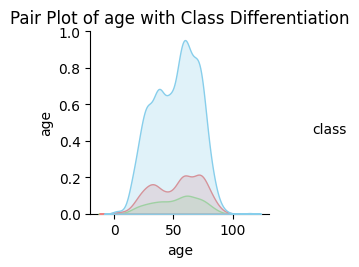

In [ ]:
#PAIR PLOT

# Selecting only the numeric columns and 'class' column from the DataFrame
numeric_columns = dfc.select_dtypes(include='number')
numeric_and_class = pd.concat([numeric_columns, dfc['class']], axis=1)

# Iterate through each numeric column and create a pair plot
for column in numeric_columns.columns:
    plt.figure(figsize=(8, 6))
    sns.pairplot(numeric_and_class, x_vars=[column], y_vars=[column], hue='class', palette={'Negative': 'skyblue', 'Hyperthyroid': 'lightcoral', 'Hypothyroid': 'lightgreen'})
    plt.title(f'Pair Plot of {column} with Class Differentiation')
    plt.show()


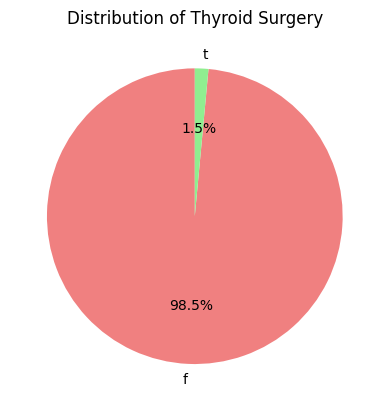

In [ ]:
#SURGERY UNDERGONE

binary_variable_counts = dfc['thyroid_surgery'].value_counts()
plt.pie(binary_variable_counts, labels=binary_variable_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightgreen'])
plt.title('Distribution of Thyroid Surgery')
plt.show()

In [ ]:
dfc.to_csv('clean_data.csv',index=False)

In [ ]:
dfc.columns

Index(['FTI', 'T3', 'T4U', 'TSH', 'TT4', 'age', 'goitre', 'hypopituitary',
       'lithium', 'on_antithyroid_medication', 'on_thyroxine', 'pregnant',
       'psych', 'query_hyperthyroid', 'query_hypothyroid',
       'query_on_thyroxine', 'referral_source', 'sex', 'sick',
       'thyroid_surgery', 'tumor', 'class'],
      dtype='object')